In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [61]:
file_dir = "/egr/research-aidd/menghan1/AnchorDrug/ActiveLearning_one_cellline/logfile/drug100"
file_list = [f for f in os.listdir(file_dir)]
cell_list = list(set([c.split('_')[1] for c in file_list]))
print(cell_list)
query_list = list(set([q.split('_')[2] for q in file_list]))
print(query_list)

['PC3', 'MCF7', 'A549']
['KMeansSampling', 'BALDDropout', 'AdversarialBIM', 'LeastConfidence', 'RandomSampling', 'BadgeSampling', 'KCenterGreedy', 'MarginSampling']


In [70]:
time_list = np.sort(list(set([q.split('_')[7] for q in file_list if q.split('_')[6]=='20240205'])))
print(time_list)

['163325' '163326' '163327' '163329' '165953' '171950' '173316' '175820'
 '180015' '182548' '184637' '190238' '191713' '204031']


In [29]:
def metrics_from_txt(fname):
    paragraph = []
    with open(fname) as f:
        for sentence in f.readlines():
            # print(sentence)
            if sentence.startswith('Round'):
                # print(sentence[:-1])
                if sentence == 'Round 0:\n':
                    paragraph.append(sentence[:-2])
                else:
                    paragraph.append(sentence[:-1])
            if sentence.startswith('testing '):
                # print(sentence[:-1])
                paragraph.append(sentence[:-1])
    # print(paragraph)
    data_dict = {}
    for n in range(len(paragraph)//3):
        roundnum = paragraph[3*n].split()[1]
        acc = paragraph[3*n+1].split()
        f1 = paragraph[3*n+2].split()
        if int(roundnum) not in data_dict:
            data_dict[int(roundnum)] = {acc[1]:[float(acc[2])], f1[1]:[float(f1[2])]}
        elif int(roundnum) in data_dict:
            data_dict[int(roundnum)][acc[1]].append(float(acc[2]))
            data_dict[int(roundnum)][f1[1]].append(float(f1[2]))
    for n in range(21):
        data_dict[n]['accuracy'] = np.mean(data_dict[n]['accuracy'])
        data_dict[n]['F1'] = np.mean(data_dict[n]['F1'])
    df = pd.DataFrame.from_dict(data_dict).T
    # print(df)
    return df
        

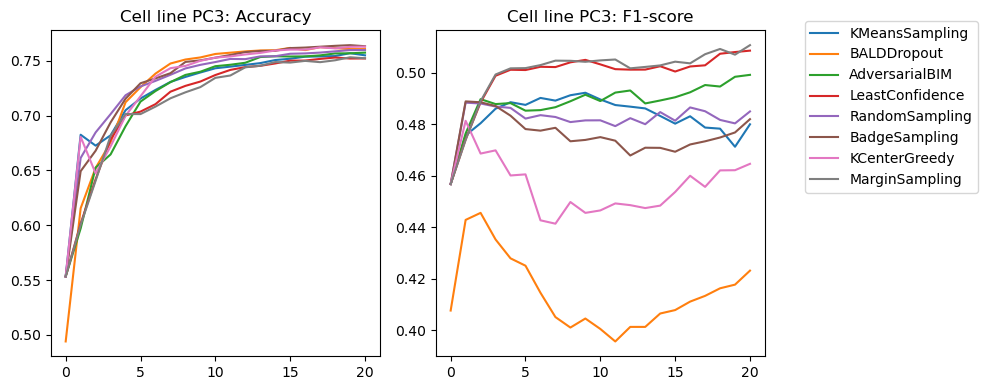

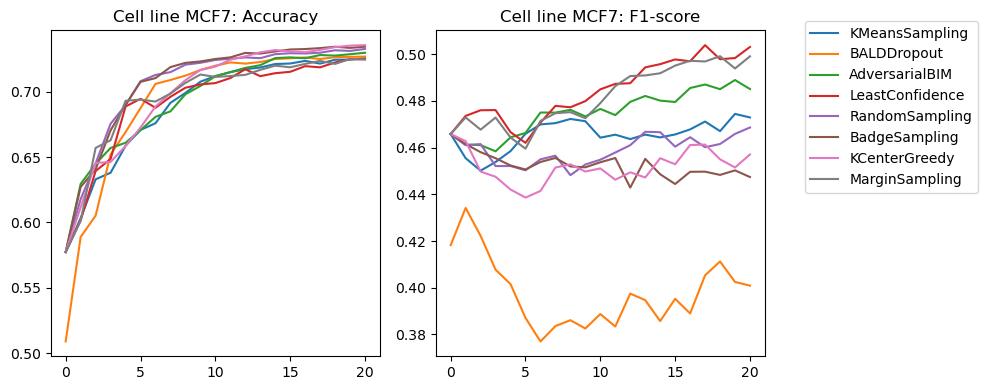

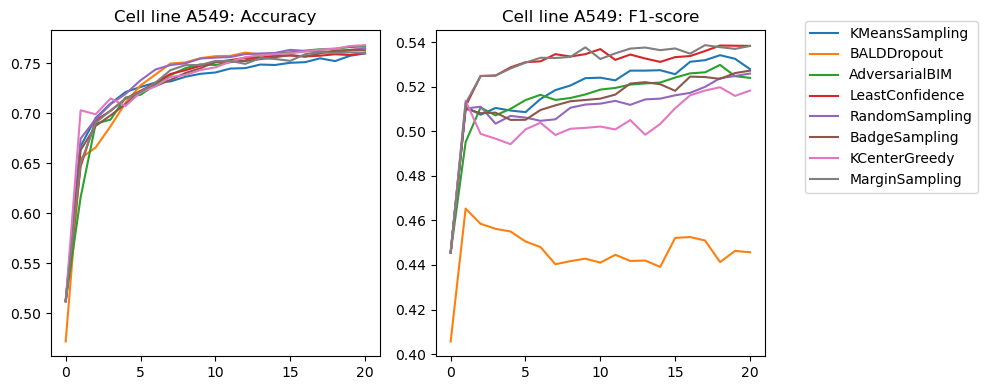

In [37]:
for cell in cell_list:
    f_c = [f for f in file_list if cell in f]
    # print(f_c)
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    for query in query_list:
        f_qc = [f for f in f_c if query in f]
        if len(f_qc)!=1:
            print('wrong')
            continue
        f_qc = f_qc[0]
        df = metrics_from_txt(f'{file_dir}/{f_qc}')
        x = df.index.to_list()
        acc = df.accuracy.to_list()
        f1 = df.F1.to_list()
        ax[0].plot(x, acc, label=query)
        ax[1].plot(x, f1, label=query)
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    ax[0].set_title(f'Cell line {cell}: Accuracy')
    ax[1].set_title(f'Cell line {cell}: F1-score')
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

0
1
2


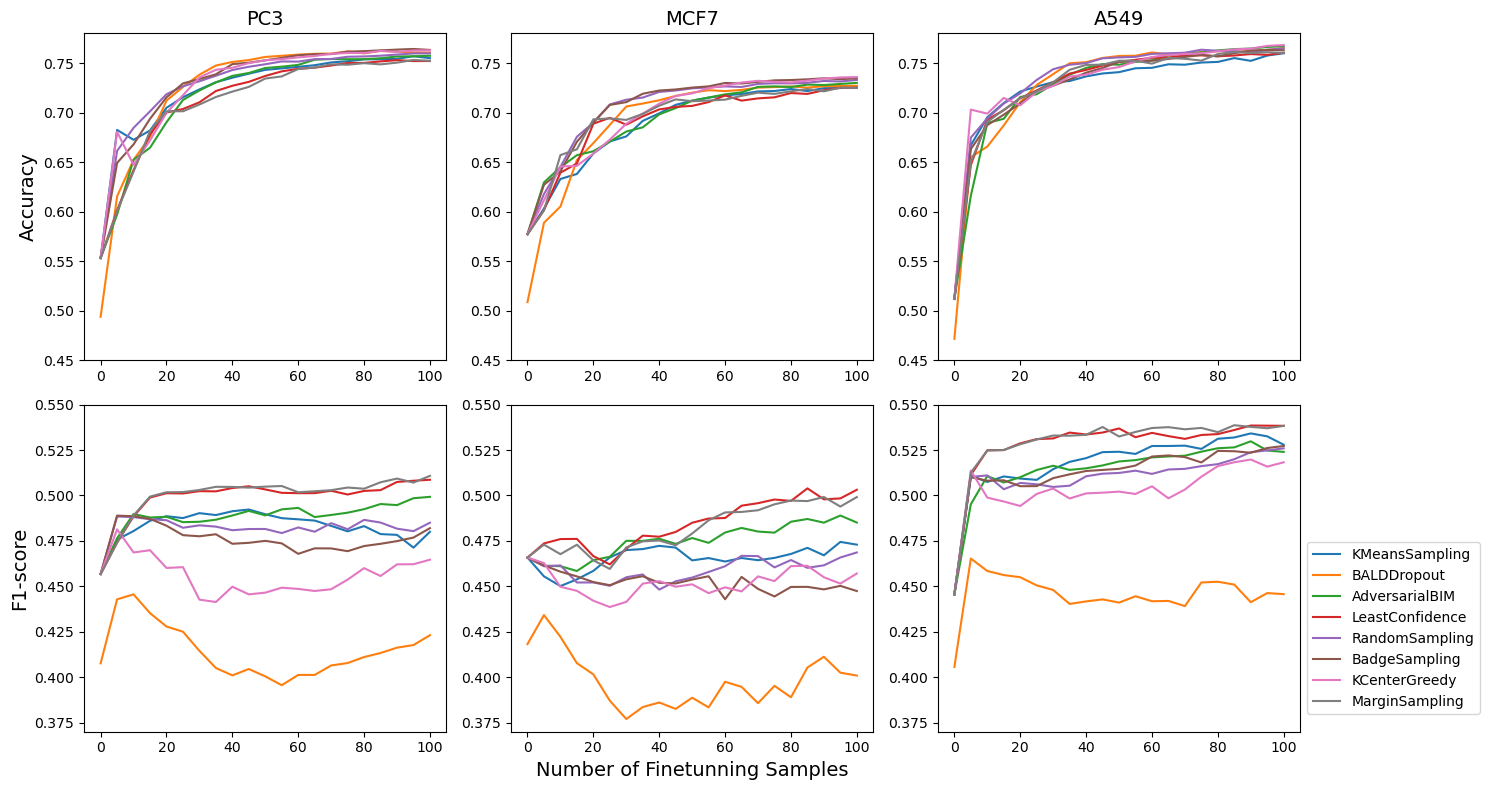

In [59]:
fig, ax = plt.subplots(2,3, figsize=(15,8))
font=14
n = 0
for cell in cell_list:
    ax[0][n].set_ylim(0.45,0.78)
    ax[1][n].set_ylim(0.37,0.55)
    f_c = [f for f in file_list if cell in f]
    # print(f_c)
    print(n)
    for query in query_list:
        f_qc = [f for f in f_c if query in f]
        if len(f_qc)!=1:
            print('wrong')
            continue
        f_qc = f_qc[0]
        df = metrics_from_txt(f'{file_dir}/{f_qc}')
        x = [x*5 for x in df.index.to_list()]
        acc = df.accuracy.to_list()
        f1 = df.F1.to_list()
        ax[0][n].set_title(cell, size=font)
        ax[0][n].plot(x, acc, label=query)
        ax[1][n].plot(x, f1, label=query)
    n += 1
ax[0][0].set_ylabel('Accuracy', size=font)
ax[1][0].set_ylabel('F1-score', size=font)
ax[1][1].set_xlabel('Number of Finetunning Samples', size=font)
plt.legend(bbox_to_anchor=(1.0, 0.6))
    # ax[0].set_title(f'Cell line {cell}: Accuracy')
    # ax[1].set_title(f'Cell line {cell}: F1-score')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()